<style>
div.blue{
    background-color:#e6f0ff; 
    border-radius: 5px; 
    padding: 20px;}
</style> 

<style>
div.warn {    
    background-color: #fcf2f2;
    border-color: #dFb5b4;
    border-left: 5px solid #dfb5b4;
    padding: 0.5em;
    }
 </style>
    
<h1 style="text-align: center; color: purple;" markdown="1">Econ 320 Python: Loops, List Comprehension and Assymptotics </h1>
<h2 style="text-align: center; color: purple;" markdown="1">Handout 8 </h2>



 


#### Package Setup

In [65]:
import numpy as np 
import pandas as pd
import statsmodels.formula.api as smf

# Data generating process when $x's$ and $u$ are not correlated 

Our population regression equation is of the from 

$$ y = 2 - 3x_1 + 4x_2 + u$$
Let's take samples of our population and estimate $\beta's$ many times to prove that $\beta's$ sampling distribution is centered on the true value.

From our samples we will run a regression 
$$  y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2x_2 + \hat{u} $$ 
When $x's$ and $u$ are not correlated the variance covariance matrix looks like:

\begin{equation*}
\Sigma^2 = 
\begin{bmatrix}
\sigma_{x_{1}}^2 & 0 & 0 \\
0 & \sigma_{x_{2}}^2 & 0 \\
0 & 0 & \sigma_{u}^2
\end{bmatrix} =
\begin{bmatrix}
4 & 0 & 0 \\
0 & 16 & 0 \\
0 & 0 & 16
\end{bmatrix}
\end{equation*}


### Properties of the $\beta's$

Now, using `numpy`, simulate some data where u is not correlated to x, and put it in a `pandas` data frame. This corresponds to the DGP: 
**Population model**  
$$y = 2 -3x_1 + 4x_2 + u$$

In [66]:
# ste up the seed 
rng = np.random.RandomState(543)
true_beta= [2,-3,4]


# 100000 draws from X ~ N(1.8,2)
x1= rng.normal(loc= 1.8, scale=2, size=100000)
# 100000 draws from X ~ N(5,4)
x2= rng.normal(loc= 5, scale=4, size=100000)
# 100000 draws from U ~ N(0,4)
u= rng.normal(loc= 0, scale=4, size=100000) 


# Create y dependent or outcome variable from the popularion regression function 
y = true_beta[0] + true_beta[1]*x1 + true_beta[2]*x2 + u


data=pd.DataFrame({'y':y,'x1': x1,'x2':x2,'u':u})
data.head()


y        x1        x2          u
0  11.917656  0.768117  4.255432  -4.799719
1   7.328325  0.846864  3.029455  -4.248904
2  21.046317  2.082213  3.778807  10.177729
3  31.824141  1.255059  8.543195  -0.583463
4  29.551012  0.166324  6.455205   2.229163

Let's do the task that we have to repeat once and think about how to do it many times:
* Take a sample, find $\hat{\beta}$.

In [67]:
# Draw a random sample of 1,000 observations from the population data.
#Estimate the parameters β_0, β_1 and β_2.
s = data.sample(n=1000, random_state=1)
reg=smf.ols(formula='y ~ x1 + x2', data=s)
reg = reg.fit()
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     8270.
Date:                  周五, 21 3月 2025   Prob (F-statistic):               0.00
Time:                        10:52:56   Log-Likelihood:                -2821.0
No. Observations:                1000   AIC:                             5648.
Df Residuals:                     997   BIC:                             5663.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1830      0.243      8.972      0.000       1.706       2.660
x1            -3.0694      0.062    -49.408      0.000      -3.191      -2.947
x2             3.9993      0.034    119.081      0.000       3.933       4.065
==============================================================================
Omnibus:                       10.242   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                7.110
Skew:                          -0.061   Prob(JB):                       0.0286
Kurtosis:                       2.606   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Repeat the process:  
* take many random samples, find $\hat{\beta}$, and store them: 

In [68]:
# set the number of iterations 
samples = 5000

# set the beta vectors 
beta0_ar = []
beta1_ar = []
beta2_ar = []

# use a loop for repetitions
for i in range(samples):
    s = data.sample(n=500, random_state=i)
    reg=smf.ols(formula='y ~ x1 + x2', data=s).fit()
    beta0_ar.append(reg.params[0])
    beta1_ar.append(reg.params[1])
    beta2_ar.append(reg.params[2])

coefs = pd.DataFrame({'beta0': beta0_ar, 'beta1': beta1_ar, 'beta2': beta2_ar})
coefs.head()



C:\Users\zhaoj\AppData\Local\Temp\ipykernel_28200\3167741401.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta0_ar.append(reg.params[0])
C:\Users\zhaoj\AppData\Local\Temp\ipykernel_28200\3167741401.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta1_ar.append(reg.params[1])
C:\Users\zhaoj\AppData\Local\Temp\ipykernel_28200\3167741401.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta2_ar.append(reg.params[2])
C

beta0     beta1     beta2
0  1.749159 -3.025569  4.053549
1  2.372800 -3.022112  3.991754
2  2.041169 -2.904156  3.966775
3  2.179143 -2.949658  3.977244
4  1.536034 -2.827258  3.984101

Let's see some summary statistics of the resulting distributions:

In [69]:
coefs.describe()

beta0        beta1        beta2
count  5000.000000  5000.000000  5000.000000
mean      1.963885    -2.997548     4.003105
std       0.332411     0.088966     0.045430
min       0.774054    -3.348139     3.846466
25%       1.736807    -3.057236     3.972799
50%       1.961183    -2.997133     4.003168
75%       2.189971    -2.938729     4.034459
max       3.065221    -2.692965     4.163186

# Using lists comprehensions

The use of lists in python allows us to store all the regression results in a single object.

Comprehensions are ways to populate lists applying a function iteratively

In [ ]:
# use the iteration object 
samples = 5000


# create the function to iterate 
def reg_f(N,rs,formula, dato):
    s = dato.sample(n=500, random_state=rs)
    reg=smf.ols(formula=formula, data=s).fit()
    return(reg)

# use the list comprehension
list_ols = {reg_f(500, i, 'y ~ x1 + x2', data) for i in range(samples)}

#We want to exteract the coefficients from the regression and put all of them into a vector
coefs =[i.params for i in list_ols]
coefs = pd.DataFrame(np.asanyarray(coefs),columns=['b0','b1','b2'])
coefs.describe()

b0           b1           b2
count  5000.000000  5000.000000  5000.000000
mean      1.963885    -2.997548     4.003105
std       0.332411     0.088966     0.045430
min       0.774054    -3.348139     3.846466
25%       1.736807    -3.057236     3.972799
50%       1.961183    -2.997133     4.003168
75%       2.189971    -2.938729     4.034459
max       3.065221    -2.692965     4.163186

: 

Now lets use `pandas.DataFrame.hist` function to visualize their distributions

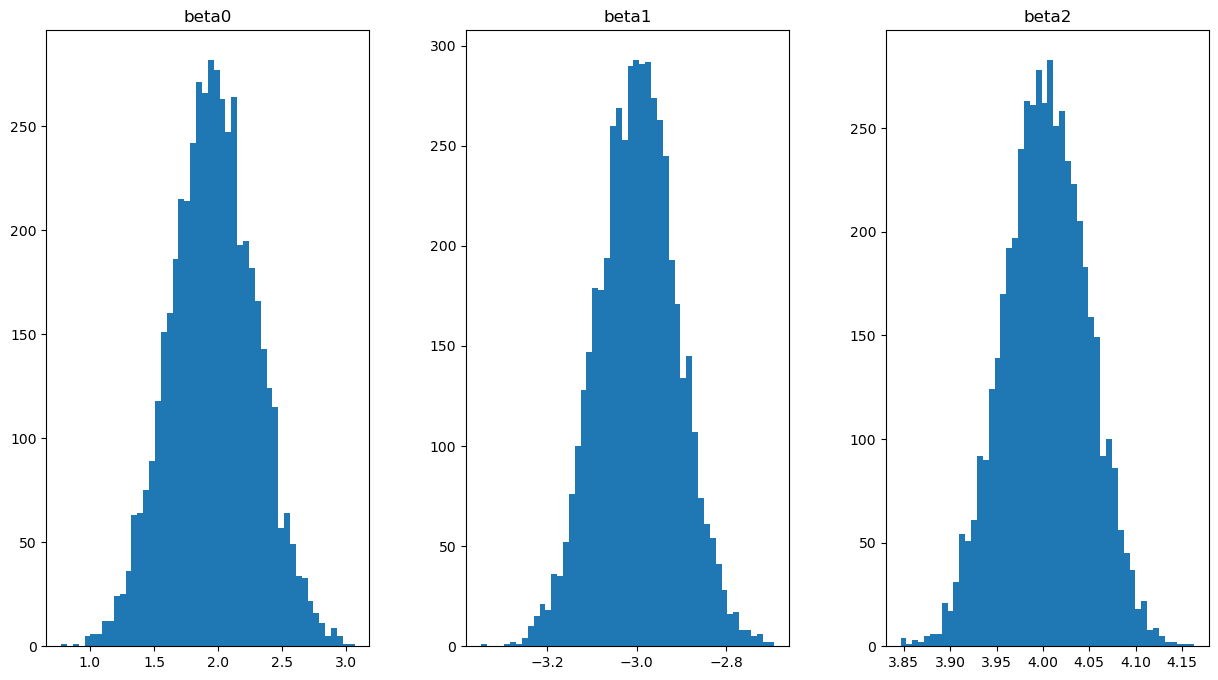

In [ ]:
coefs.hist(figsize=(15,8), grid=False, bins=50, layout=(1,3));


In [ ]:
# !jupyter nbconvert --to html nameoffile.ipynb

&nbsp;
<hr />
<p style="font-family:palatino; text-align: center;font-size: 15px">ECON320 Python Programming Laboratory</a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px">Professor <em> Paloma Lopez de mesa Moyano</em></a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px"><span style="color: #6666FF;"><em>paloma.moyano@emory.edu</em></span></p>

<p style="font-family:palatino; text-align: center;font-size: 15px">Department of Economics</a></p>
<p style="font-family:palatino; text-align: center; color: #012169;font-size: 15px">Emory University</a></p>

&nbsp;